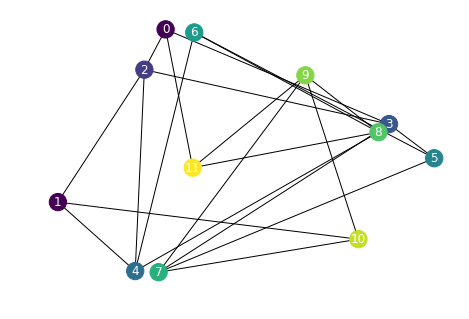

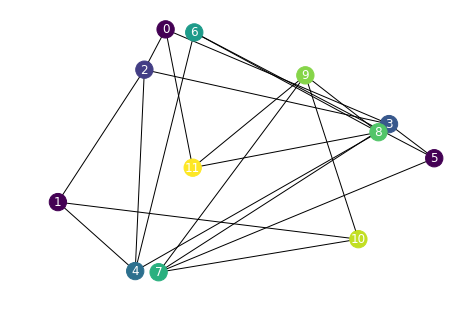

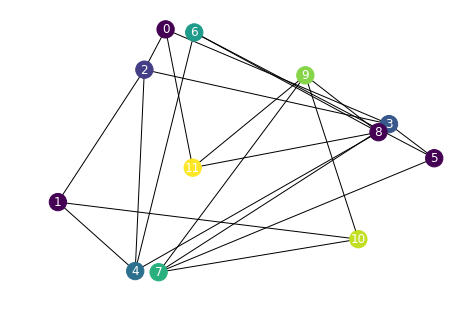

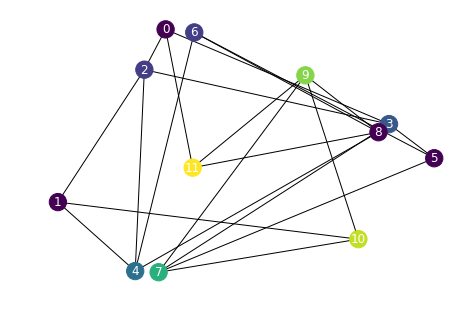

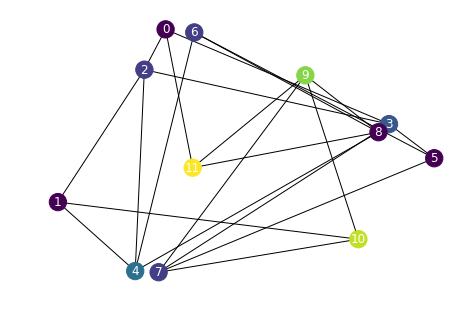

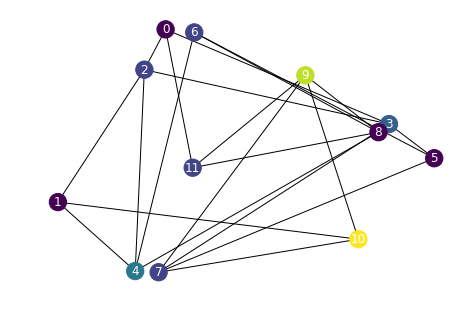

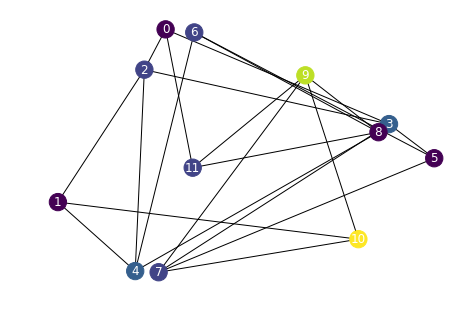

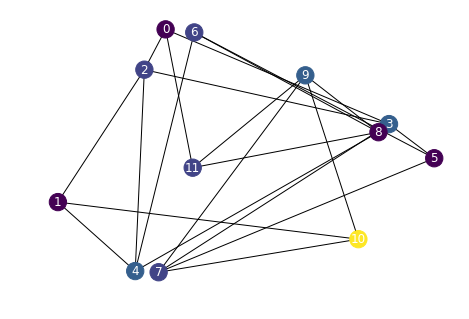

the feasible coloring is:
{0: 0, 1: 0, 2: 2, 3: 3, 4: 3, 5: 0, 6: 2, 7: 2, 8: 0, 9: 3, 10: 10, 11: 2}
number of colors used = 4


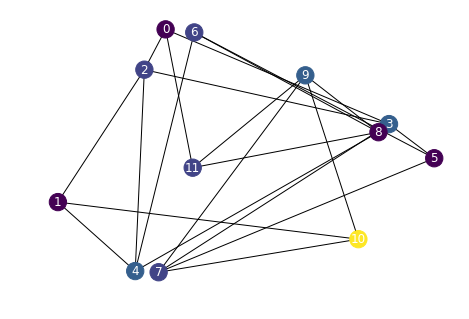

{0: 0, 1: 0, 2: 2, 3: 3, 4: 3, 5: 0, 6: 2, 7: 2, 8: 0, 9: 3, 10: 10, 11: 2}

In [4]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import time

#input any undirected graph G (nodes labeled 0,1,...,n-1)
#dictionary (key: node, value:color)

def graph_coloring_local(G):
    #initialize all nodes a different color
    n = G.number_of_nodes()
    coloring = {}
    for i in range(0,n):
        coloring[i] = i
    #assign random coordinates to nodes in G for printing
    pos={}
    lab=[]
    for i in range(0,n):
        x=np.random.random_sample()
        y=np.random.random_sample()
        pos[i]=(x,y)     # coordinates for drawing
        lab.append(i)       # label for drawing


    local_opt = 0
    while local_opt == 0:
        colors = list(coloring.values())
        to_break = 0
        for c in colors:
            for j in colors:
                if j > c:
                    subgraph_nodes_c = []
                    subgraph_nodes_j = []
                    for node in coloring.keys():
                    #all nodes colored c
                        if coloring[node] == c:
                            subgraph_nodes_c.append(node)
                        #all nodes colored j
                        elif coloring[node] == j:
                            subgraph_nodes_j.append(node)
                    #form subgraph with those 2 colors
                    G1 = nx.Graph()
                    G1 = G.subgraph(subgraph_nodes_c + subgraph_nodes_j)
                    #no connected components (ie no edges), change color of j to c
                    if G1.number_of_edges() == 0:
                        for k in subgraph_nodes_j:
                            coloring[k] = c
                        #print when a color is eliminated
                        values = [coloring.get(node, 0.25) for node in G.nodes()]
                        nx.draw(G, pos = pos, node_color = values, with_labels=True, font_color = 'white')
                        plt.show()
                        to_break = 1 #improvement found, update coloring and find new pair of colorings to swap
                    else:
                        #set of nodes for each connected components
                        comps = list(nx.connected_components(G1))

                        #initial function value -(|c|^2+|j|^2)
                        c_size = len(subgraph_nodes_c)
                        j_size = len(subgraph_nodes_j)
                        v_int = -(c_size**2 + j_size**2)
                        for l in comps:
                        #changed function value
                            l = list(l)
                            c_swap = list(set(subgraph_nodes_c) & set(l))
                            j_swap = list(set(subgraph_nodes_j) & set(l))
                            v_change = -((c_size + len(j_swap) - len(c_swap))**2 + (j_size + len(c_swap) - len(j_swap))**2)
                            if v_change < v_int:
                                for k in c_swap:
                                    coloring[k] = j
                                for k in j_swap:
                                    coloring[k] = c
                                break
                                to_break = 1 #improvement found, update coloring and find new pair of colorings to swap
                    if to_break == 1:
                        break
                if to_break == 1:
                    break

        if to_break == 0: #at end of for loop no swaps happen
            local_opt = 1 #if ever all pairs of colors checked without breaking, local minimum; stop algorithm
    values = [coloring.get(node, 0.25) for node in G.nodes()]
    print("the feasible coloring is:")
    print(coloring)
    num = len(set(coloring.values()))
    print("number of colors used =", num)
    nx.draw(G, pos = pos, node_color = values, with_labels = True, font_color = 'white')
    plt.show()

    return coloring

MUG12c = nx.Graph()
#this graph is 4-colorable
MUG12c.add_edges_from([(0,2),(0,3),(0,11),
                        (1,2),(1,4),(1,10),
                        (2,3),(2,4),
                        (3,5),(3,7),
                        (4,6),(4,8),
                        (5,6),(5,7),
                        (6,8),
                        (7,9),(7,10),
                        (8,9),(8,11),
                        (9,10),(9,11)])

graph_coloring_local(MUG12c)

